In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv('/content/sample_data/PlayTennis.csv')

In [3]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
df['play'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
df.isnull().sum().sum()

0

In [7]:
df.shape

(14, 5)

In [8]:
# Splitting Target value 

In [10]:
X = df.drop(['play'],axis=1)
Y = df['play']

<Axes: xlabel='play', ylabel='Count'>

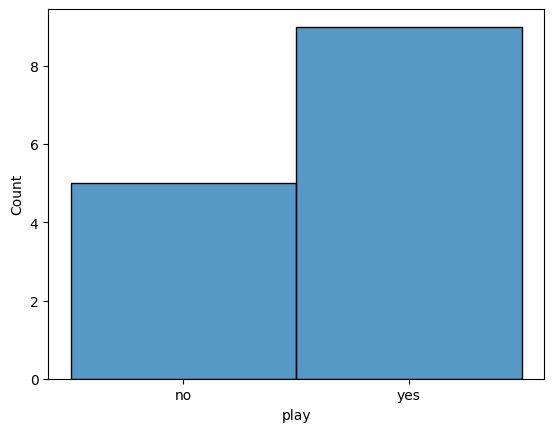

In [11]:
sns.histplot(Y)

In [12]:
X

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [13]:
X = pd.get_dummies(X)

In [14]:
X

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder  = LabelEncoder()

In [17]:
X['windy'] = encoder.fit_transform(X['windy'])

In [18]:
X.head()

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1


In [19]:
Y = encoder.fit_transform(Y)

In [21]:
Y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
X_train.shape, X_test.shape

((11, 9), (3, 9))

In [27]:
y_train.shape, y_test.shape

((11,), (3,))

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
decisonTreeEntropy = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=3)

In [39]:
decisonTreeEntropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.6, 0.875, 'x[1] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.4, 0.625, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.375, 'x[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

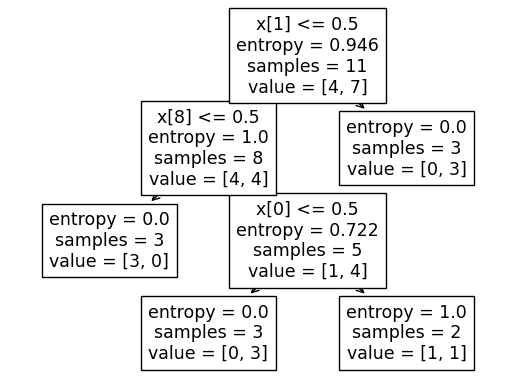

In [40]:
tree.plot_tree(decisonTreeEntropy.fit(X_train,y_train))

In [41]:
Y_pred = decisonTreeEntropy.predict(X_test)

In [42]:
Y_train_pred = decisonTreeEntropy.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, Y_pred)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, Y_train_pred)))

Model accuracy score with criterion gini index: 0.6667
Training-set accuracy score: 0.9091


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [46]:
cm = confusion_matrix(y_test, Y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 0]
 [1 1]]


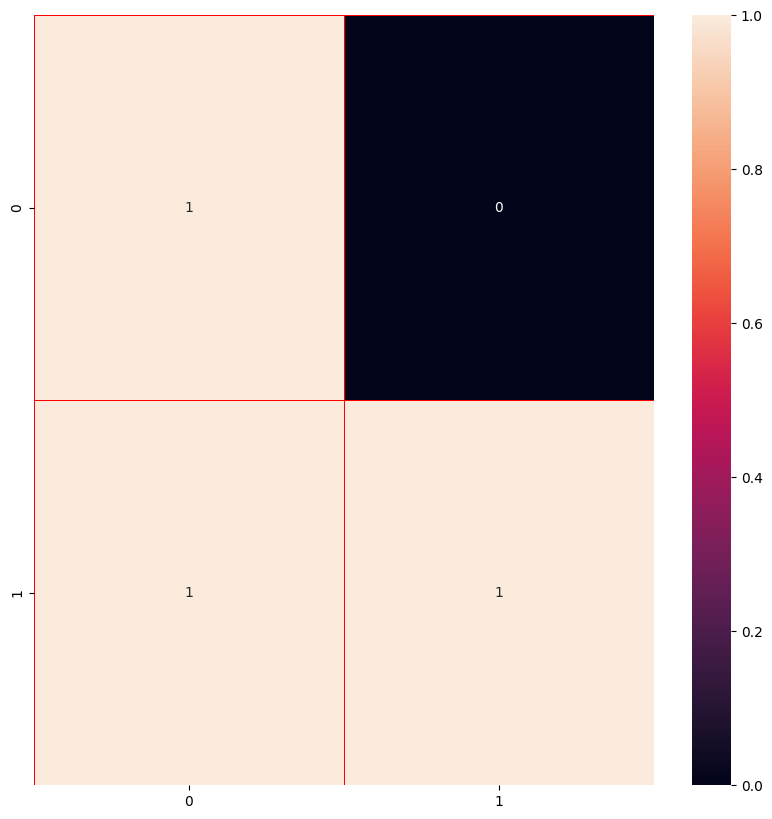

<Figure size 640x480 with 0 Axes>

In [47]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [48]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [49]:
f1_score = f1_score(y_test, Y_pred)
print("F1 Score:",f1_score)

F1 Score: 0.6666666666666666
